[-0.43926125  0.95858535  0.15965417]
1.0664547635724093


2000

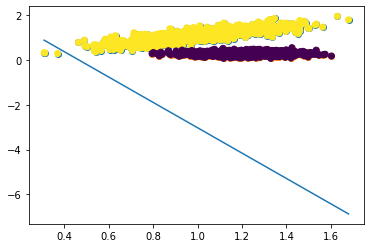

In [4]:
import numpy as np
import matplotlib.pyplot as plt

#np.random.seed(22)

# generate N points per class
N = 1000

X1_1 = 2 * np.random.normal(loc=0.5, scale=0.1, size=N)
X2_1 = X1_1 + np.random.normal(loc = 0, scale = 0.15, size=N) + 0.1
# generate labels
Y1 = np.ones(N)

X1_2 = 2 * np.random.normal(loc=0.6, scale=0.07, size=N)
X2_2 = np.random.normal(loc=0.6, scale=0.07, size=N) - 0.3 #X1 * 2 + np.random.normal(loc = 0, scale = 0.1, size=N)
# generate labels
Y2 = -np.ones(N)

plt.scatter(X1_1, X2_1)
plt.scatter(X1_2, X2_2)

# generate w_0,....,w_n
w = np.random.uniform(low=-1,size=3)
#w = w / np.linalg.norm(w)

print(w)
print(np.linalg.norm(w))

plt.plot([np.min(X1_1), np.max(X1_1)], [np.min(X1_1) * (-w[1]/w[2]) - w[0]/w[2], np.max(X1_2) * (-w[1]/w[2]) - w[0]/w[2]])

# generate coordinate X0
X0 = np.ones(N * 2)
#X0 = X0[:, np.newaxis]

X1 = np.concatenate((X1_1, X1_2))
X2 = np.concatenate((X2_1, X2_2))

X = np.stack((X0, X1, X2), axis=1)

y = np.concatenate((Y1, Y2))

#X = np.hstack((X0, np.vstack((X1, X2))))
plt.scatter(X[:, 1], X[:, 2], c=y)

y.shape[0]

In [5]:
def error_w(X, y, w):
    error = np.sum(np.square(y - np.dot(X, w))) / 2
    return error

error_w(X, y, w)

1632.4918878237977

# of errors =  0
# of epochs =  6


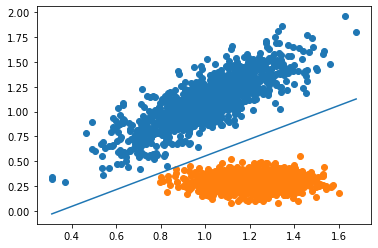

In [6]:
# generate w_0,....,w_n
#w = np.random.uniform(low=-1,size=3)

# set learning rate 0 < eta < 1
eta = 1e-0

# check epochs
epochs = 0

# set maximum epochs
max_epochs = 100

# track total error per epoch
total_error = np.zeros(max_epochs)

# set checkpoint
total_num_errors = np.zeros(max_epochs)

while (epochs < max_epochs):
    
    #w = w / np.linalg.norm(w)
    
    # compute number of errors
    num_errors = 0
    
    # comput initial number of errors
    total_error[epochs] = error_w(X, y, w)
        
    for i in range(y.shape[0]):
        #x = X[i, :]
        #y = y[i]
        #print(x, y)
        
        dot_prod = np.dot(X[i, :], w)
        #print(dot_prod * y)
        
        if ((dot_prod * y[i]) < 0):
            w = w + eta * (X[i, :] * y[i])
            num_errors += 1
            #print(num_errors)
    
    total_num_errors[epochs] = num_errors
    
    if (num_errors == 0):
        break
    else:
        epochs += 1
    
print("# of errors = ", num_errors)
    
plt.scatter(X1_1, X2_1)
plt.scatter(X1_2, X2_2)
#print(eta)
print("# of epochs = ", epochs)
plt.plot([np.min(X1), np.max(X1)], [np.min(X1) * (-w[1]/w[2]) - w[0]/w[2], np.max(X1) * (-w[1]/w[2]) - w[0]/w[2]])

In [7]:
total_error[total_error > 0]

array([1632.49188782,  854.57158981, 1053.51432609, 1863.60163935,
       3231.15637865, 3963.11855701,   93.12937248])

In [8]:
range(sum(total_error > 0))

range(0, 7)

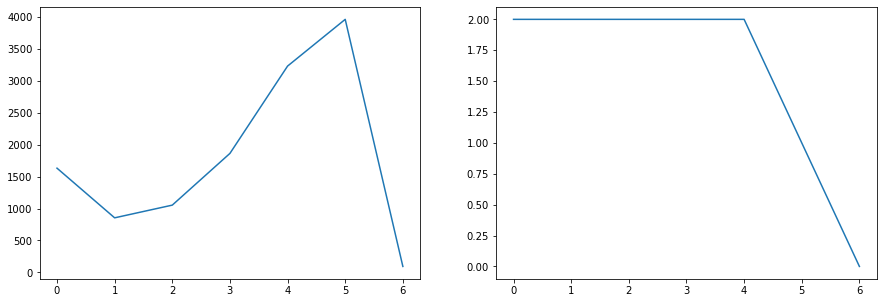

In [9]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5), sharey=False)

axs[0].plot(range(sum(total_error > 0)), total_error[total_error > 0])

axs[1].plot(range(sum(total_error > 0)), total_num_errors[total_error > 0])
#fig.suptitle('Categorical Plotting')

In [10]:
rand_perm = np.random.permutation(range(y.shape[0]))

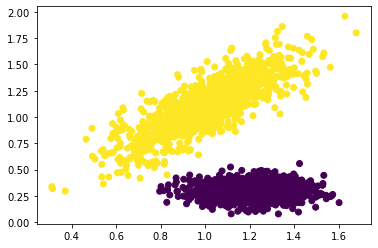

In [11]:
plt.scatter(X[rand_perm, 1], X[rand_perm, 2], c=y[rand_perm])

# of errors =  0
# of epochs =  1


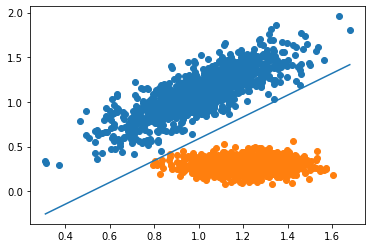

In [12]:
# generate w_0,....,w_n
w = np.random.uniform(low=-1,size=3)

# set learning rate 0 < eta < 1
eta = 1e-0

# check epochs
epochs = 0

# set maximum epochs
max_epochs = 100

# track total error per epoch
total_error = np.zeros(max_epochs)

# set checkpoint
total_num_errors = np.zeros(max_epochs)

while (epochs < max_epochs):
    
    #w = w / np.linalg.norm(w)
    
    # compute number of errors
    num_errors = 0
    
    # comput initial number of errors
    total_error[epochs] = error_w(X, y, w)
    
    # shuffle objects
    rand_perm = np.random.permutation(range(y.shape[0]))
    
    # X_shuffle
    X = X[rand_perm, :]
    y = y[rand_perm]
    
    for xi, yi in zip(X, y):
        
        dot_prod = np.dot(xi, w)
        
        if ((dot_prod * yi) < 0):
            w = w + eta * (xi * yi)
            num_errors += 1

    total_num_errors[epochs] = num_errors
    
    if (num_errors == 0):
        break
    else:
        epochs += 1
    
print("# of errors = ", num_errors)
    
plt.scatter(X1_1, X2_1)
plt.scatter(X1_2, X2_2)
#print(eta)
print("# of epochs = ", epochs)
plt.plot([np.min(X1), np.max(X1)], [np.min(X1) * (-w[1]/w[2]) - w[0]/w[2], np.max(X1) * (-w[1]/w[2]) - w[0]/w[2]])